In [1]:
pip install imbalanced-learn

     |████████████████████████████████| 167 kB 4.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
url1="https://bd29ee0e-54ab-4daa-9671-d153865d1620.usrfiles.com/ugd/bd29ee_76794e1edf45422ba8d51951afdf68e0.csv"
df1=pd.read_csv(url1,header=None,sep=";")
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,1290,1291,1292,1293,1294,1295,1296,1297,1298,1299
0,0,0,0.0,0.0,0.0,0,44431.921875,0.0,0.0,0.0,...,0.000000,0.0,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0,0,0.0,0.0,0.0,0,0.000000,0.0,0.0,0.0,...,27667.777344,0.0,0,0.0,35438.351562,0.0,0.0,0.0,0.0,0.0
2,0,0,0.0,0.0,0.0,0,0.000000,0.0,0.0,0.0,...,59820.968750,0.0,0,0.0,6384.590820,0.0,0.0,0.0,0.0,0.0
3,0,0,0.0,0.0,0.0,0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0,0,0.0,0.0,0.0,0,4701.712402,0.0,0.0,0.0,...,3913.969727,0.0,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [2]:
df1.shape

(571, 1300)

In [3]:
url2="https://bd29ee0e-54ab-4daa-9671-d153865d1620.usrfiles.com/ugd/bd29ee_c30417ea43cd4361a1701ab98bb2e29f.csv"
df2=pd.read_csv(url2,sep=";")
df2.head()

,Species,Strain
0,RTO.TQH,1
1,BUT.YZE,2
2,BUT.YZE,2
3,BUT.YZE,2
4,BUT.YZE,2


In [4]:
y=df2[["Species"]]
y.groupby("Species")["Species"].count()

Species
AUG.AEX    50
AUG.HSS    21
BUT.BIK    18
BUT.DNW    32
BUT.TRH    31
BUT.YZE    60
EMD.FZO    27
EMD.WXC    20
JNH.FLH    28
JNH.ZIJ    26
NYV.VCE    52
NYV.XSY    29
QBG.CRP    14
QBG.KGI    16
QWP.DRH    26
QWP.LRO    11
RTO.JFR    26
RTO.TQH    24
VVJ.KSF    29
VVJ.KWJ    31
Name: Species, dtype: int64

In [5]:
X=df1

In [10]:
import numpy as np
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

test = SelectKBest(score_func=mutual_info_classif, k="all")
fit = test.fit(X, np.asarray(y).reshape(y.shape[0],))
features = fit.transform(X)
set_printoptions(precision=3)

scores=fit.scores_
scores=pd.DataFrame(scores)
scores=scores.rename(columns={0:"scores"})
scores=scores.sort_values(by=["scores"],ascending=False)
scores

,scores
1260,0.518593
619,0.509946
578,0.466237
837,0.462482
21,0.461245
...,...
332,0.000000
338,0.000000
883,0.000000
881,0.000000


In [11]:
scores=scores[scores["scores"]>0]
scores

,scores
1260,0.518593
619,0.509946
578,0.466237
837,0.462482
21,0.461245
...,...
1061,0.000180
248,0.000126
1296,0.000102
29,0.000099


In [12]:
X_scores=scores[scores["scores"]>0.09]
len(X_scores)

413

In [13]:
Xp=X.iloc[:,X_scores.index]
Xp.head()

,1260,619,578,837,21,1214,127,728,1268,936,...,644,806,1158,722,326,153,273,655,236,845
0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,895367.6875,0.0,0.0,...,53990.886719,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.116094e+05,0.0,0.0,0.0,0.0,0.0,797430.6250,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.256013e+05,0.0,0.0,0.0,0.0,0.0,556281.8750,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,6.334030e+06,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,8.923085e+06,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
Xp=pd.DataFrame(scaler.fit_transform(Xp))
Xp.head()

,0,1,2,3,4,5,6,7,8,9,...,403,404,405,406,407,408,409,410,411,412
0,-0.511659,-0.356600,-0.387025,-0.430188,-0.312801,-0.357702,-0.417643,0.783277,-0.322414,-0.297368,...,0.368071,-0.139865,-0.1507,-0.068823,-0.105676,-0.134503,-0.17638,-0.216628,-0.190744,-0.121638
1,-0.511659,-0.309299,-0.387025,-0.430188,-0.312801,-0.357702,-0.417643,0.656361,-0.322414,-0.297368,...,-0.177893,-0.139865,-0.1507,-0.068823,-0.105676,-0.134503,-0.17638,-0.216628,-0.190744,-0.121638
2,-0.511659,-0.303370,-0.387025,-0.430188,-0.312801,-0.357702,-0.417643,0.343858,-0.322414,-0.297368,...,-0.177893,-0.139865,-0.1507,-0.068823,-0.105676,-0.134503,-0.17638,-0.216628,-0.190744,-0.121638
3,-0.511659,2.327818,-0.387025,-0.430188,-0.312801,-0.357702,-0.417643,-0.377024,-0.322414,-0.297368,...,-0.177893,-0.139865,-0.1507,-0.068823,-0.105676,-0.134503,-0.17638,-0.216628,-0.190744,-0.121638
4,-0.511659,3.425082,-0.387025,-0.430188,-0.312801,-0.357702,-0.417643,-0.377024,-0.322414,-0.297368,...,-0.177893,-0.139865,-0.1507,-0.068823,-0.105676,-0.134503,-0.17638,-0.216628,-0.190744,-0.121638


In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Xp,y,test_size=0.18,random_state=42)
print(X_train.shape)
print(X_test.shape)

(468, 413)
(103, 413)


In [88]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm
model1=OneVsRestClassifier(svm.SVC(kernel="poly",degree=1,
                                   random_state=0)).fit(X_train,np.asarray(y_train).reshape(y_train.shape[0],))
model1

OneVsRestClassifier(estimator=SVC(degree=1, gamma='auto', kernel='poly',
                                  random_state=0))

In [89]:
from sklearn.metrics import accuracy_score
train_pred=model1.predict(X_train)
test_pred=model1.predict(X_test)
print("Accuracy on train data: ",accuracy_score(y_train,train_pred))
print("Accuracy on test data: ",accuracy_score(y_test,test_pred))

Accuracy on train data:  0.9401709401709402
Accuracy on test data:  0.9029126213592233


In [64]:
from sklearn.multiclass import OneVsOneClassifier
model2=OneVsOneClassifier(svm.SVC(kernel="poly",degree=1,
                                   random_state=0)).fit(X_train,np.asarray(y_train).reshape(y_train.shape[0],))
model2

OneVsOneClassifier(estimator=SVC(degree=1, kernel='poly', random_state=0))

In [65]:
train_pred=model2.predict(X_train)
test_pred=model2.predict(X_test)
print("Accuracy on train data: ",accuracy_score(y_train,train_pred))
print("Accuracy on test data: ",accuracy_score(y_test,test_pred))

Accuracy on train data:  0.7927350427350427
Accuracy on test data:  0.7378640776699029


In [82]:
model3=svm.SVC(C=2,kernel="linear",random_state=0).fit(X_train,np.asarray(y_train).reshape(y_train.shape[0],))
model3

SVC(C=2, kernel='linear', random_state=0)

In [83]:
train_pred=model3.predict(X_train)
test_pred=model3.predict(X_test)
print("Accuracy on train data: ",accuracy_score(y_train,train_pred))
print("Accuracy on test data: ",accuracy_score(y_test,test_pred))

Accuracy on train data:  0.9957264957264957
Accuracy on test data:  0.8058252427184466


In [22]:
from sklearn.neighbors import KNeighborsClassifier
model4=KNeighborsClassifier(n_neighbors=1).fit(X_train,np.asarray(y_train).reshape(y_train.shape[0],))
model4

KNeighborsClassifier(n_neighbors=1)

In [23]:
train_pred=model4.predict(X_train)
test_pred=model4.predict(X_test)
print("Accuracy on train data: ",accuracy_score(y_train,train_pred))
print("Accuracy on test data: ",accuracy_score(y_test,test_pred))

Accuracy on train data:  1.0
Accuracy on test data:  0.8155339805825242


In [24]:
model5=OneVsRestClassifier(KNeighborsClassifier(n_neighbors=1)).fit(X_train,np.asarray(y_train).reshape(y_train.shape[0],))
model5

OneVsRestClassifier(estimator=KNeighborsClassifier(n_neighbors=1))

In [25]:
train_pred=model5.predict(X_train)
test_pred=model5.predict(X_test)
print("Accuracy on train data: ",accuracy_score(y_train,train_pred))
print("Accuracy on test data: ",accuracy_score(y_test,test_pred))

Accuracy on train data:  1.0
Accuracy on test data:  0.8155339805825242


In [26]:
model6=OneVsOneClassifier(KNeighborsClassifier(n_neighbors=1)).fit(X_train,np.asarray(y_train).reshape(y_train.shape[0],))
model6

OneVsOneClassifier(estimator=KNeighborsClassifier(n_neighbors=1))

In [27]:
train_pred=model6.predict(X_train)
test_pred=model6.predict(X_test)
print("Accuracy on train data: ",accuracy_score(y_train,train_pred))
print("Accuracy on test data: ",accuracy_score(y_test,test_pred))

Accuracy on train data:  1.0
Accuracy on test data:  0.8155339805825242


In [54]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [55]:
X_res.shape

(1000, 413)

In [56]:
model7=OneVsRestClassifier(svm.SVC(kernel="poly",degree=1,
                                   random_state=0)).fit(X_res,np.asarray(y_res).reshape(y_res.shape[0],))
model7

OneVsRestClassifier(estimator=SVC(degree=1, kernel='poly', random_state=0))

In [57]:
train_pred=model7.predict(X_res)
test_pred=model7.predict(X_test)
print("Accuracy on train data: ",accuracy_score(y_res,train_pred))
print("Accuracy on test data: ",accuracy_score(y_test,test_pred))

Accuracy on train data:  0.963
Accuracy on test data:  0.941747572815534


Confusion matrix for test data: 



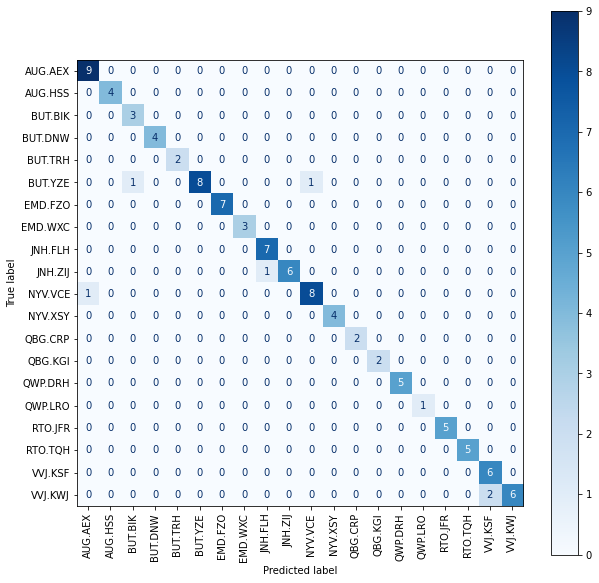

In [58]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
print("Confusion matrix for test data: \n")
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(model7, X_test, y_test, cmap=plt.cm.Blues, xticks_rotation="vertical",ax=ax)
plt.show()

In [59]:
from sklearn.metrics import classification_report
print("Classification report for test data: \n",classification_report(y_test,test_pred,zero_division=0))

Classification report for test data: 
               precision    recall  f1-score   support

     AUG.AEX       0.90      1.00      0.95         9
     AUG.HSS       1.00      1.00      1.00         4
     BUT.BIK       0.75      1.00      0.86         3
     BUT.DNW       1.00      1.00      1.00         4
     BUT.TRH       1.00      1.00      1.00         2
     BUT.YZE       1.00      0.80      0.89        10
     EMD.FZO       1.00      1.00      1.00         7
     EMD.WXC       1.00      1.00      1.00         3
     JNH.FLH       0.88      1.00      0.93         7
     JNH.ZIJ       1.00      0.86      0.92         7
     NYV.VCE       0.89      0.89      0.89         9
     NYV.XSY       1.00      1.00      1.00         4
     QBG.CRP       1.00      1.00      1.00         2
     QBG.KGI       1.00      1.00      1.00         2
     QWP.DRH       1.00      1.00      1.00         5
     QWP.LRO       1.00      1.00      1.00         1
     RTO.JFR       1.00      1.00      1.0

#### The most promising model is a SVM wrapped inside OneVsRestClassifier (1) with train data resampled to balance the class distributions and with "sampling_strategy" set at "not minority"; (2) "poly" kernel with "degree" set at 1. The train_test_split ratio is 0.82:0.18. This model is 96.3% accurate on train data and 94.17% accurate on test data.

#### The following is a experiment on the method introduced in a research paper. The accuracy delivered by this method is not competitive at all.

In [40]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
cv = LeaveOneOut()
model = OneVsRestClassifier(svm.SVC(kernel="poly",degree=1,
                                   random_state=0))
scores = cross_val_score(model, Xp, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [41]:
print('Accuracy: %.3f (%.3f)' % (scores.mean(),scores.std()))

Accuracy: 0.863 (0.343)
